# Importing librabres

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
print(tf.__version__)

2.15.0


# Data Preprocessing

## Training Image Preprocessing

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
   "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## Validation Preprocessing

In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
   "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[112.25 101.25 115.25]
   [125.5  114.5  128.5 ]
   [126.5  115.5  129.5 ]
   ...
   [122.25 114.25 127.25]
   [128.5  120.5  133.5 ]
   [113.5  105.5  118.5 ]]

  [[118.75 107.75 121.75]
   [109.    98.   112.  ]
   [121.   110.   124.  ]
   ...
   [102.    94.   107.  ]
   [121.5  113.5  126.5 ]
   [108.25 100.25 113.25]]

  [[129.   118.   132.  ]
   [117.25 106.25 120.25]
   [126.5  115.5  129.5 ]
   ...
   [101.25  93.25 106.25]
   [105.5   97.5  110.5 ]
   [135.5  127.5  140.5 ]]

  ...

  [[153.5  150.5  161.5 ]
   [163.   160.   171.  ]
   [180.5  177.5  188.5 ]
   ...
   [161.   159.   173.  ]
   [146.5  144.5  158.5 ]
   [166.75 164.75 178.75]]

  [[172.   169.   180.  ]
   [167.75 164.75 175.75]
   [174.5  171.5  182.5 ]
   ...
   [162.5  160.5  174.5 ]
   [167.   165.   179.  ]
   [143.   141.   155.  ]]

  [[169.75 166.75 177.75]
   [168.5  165.5  176.5 ]
   [163.25 160.25 171.25]
   ...
   [155.75 153.75 167.75]
   [155.25 153.25 167.25]
   [141.25 139.25 15

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model =Sequential()

## Builiding Convolutional Layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3),  activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3),  activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.35))

## Output Layer


In [17]:
model.add(Dense(units=38,activation='softmax'))

In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Training Model

In [20]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10) 

Epoch 1/10
   2/2197 ━━━━━━━━━━━━━━━━━━━━ 2:48 77ms/step - accuracy: 0.0234 - loss: 5.0141   

I0000 00:00:1720901140.764564      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720901140.794555      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4125 - loss: 2.0901

W0000 00:00:1720901254.630341      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720901255.692061      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 162s 64ms/step - accuracy: 0.4126 - loss: 2.0897 - val_accuracy: 0.8416 - val_loss: 0.4979
Epoch 2/10
   3/2197 ━━━━━━━━━━━━━━━━━━━━ 1:39 45ms/step - accuracy: 0.7639 - loss: 0.7437

W0000 00:00:1720901280.773755      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 109s 50ms/step - accuracy: 0.8348 - loss: 0.5214 - val_accuracy: 0.8955 - val_loss: 0.3152
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 111s 51ms/step - accuracy: 0.9065 - loss: 0.2870 - val_accuracy: 0.9339 - val_loss: 0.2076
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9346 - loss: 0.2004 - val_accuracy: 0.9419 - val_loss: 0.1804
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9492 - loss: 0.1482 - val_accuracy: 0.9509 - val_loss: 0.1600
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9632 - loss: 0.1123 - val_accuracy: 0.9411 - val_loss: 0.1954
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 50ms/step - accuracy: 0.9667 - loss: 0.0982 - val_accuracy: 0.9514 - val_loss: 0.1520
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9755 - loss: 0.0743 - val_accuracy: 0.9540 - val_loss: 0.1494
Epoch 9/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9804 - lo

# # MODEL EVALUTION 

In [21]:
train_loss,train_accu=model.evaluate(training_set)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9930 - loss: 0.0209


W0000 00:00:1720902354.519636      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [22]:
print(train_loss,train_accu);

0.019860515370965004 0.9936126470565796


In [23]:
val_loss,val_accu=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9683 - loss: 0.1013


In [24]:
print(val_loss,val_accu)

0.10160098969936371 0.9697245359420776


In [25]:
training_history.history

{'accuracy': [0.6079806685447693,
  0.8580837845802307,
  0.9139910340309143,
  0.9395831823348999,
  0.953965425491333,
  0.964108407497406,
  0.970694899559021,
  0.9766839742660522,
  0.9802119731903076,
  0.9821040034294128],
 'loss': [1.3335902690887451,
  0.44634491205215454,
  0.2638501226902008,
  0.183333620429039,
  0.13696503639221191,
  0.10920419543981552,
  0.08737988024950027,
  0.07255511730909348,
  0.06106913089752197,
  0.056098341941833496],
 'val_accuracy': [0.8416230082511902,
  0.8954586982727051,
  0.9338720440864563,
  0.9418962001800537,
  0.9509446620941162,
  0.9410994648933411,
  0.9513999819755554,
  0.9540177583694458,
  0.9590257406234741,
  0.9697245359420776],
 'val_loss': [0.497884601354599,
  0.3152198791503906,
  0.2075572907924652,
  0.1803874671459198,
  0.1599828600883484,
  0.19540421664714813,
  0.15196728706359863,
  0.14942340552806854,
  0.13240061700344086,
  0.1016010120511055]}

# Accuracy Visualization

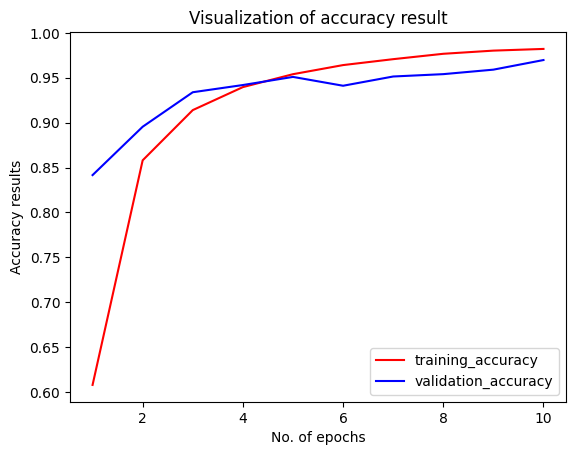

In [26]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='training_accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='validation_accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy results")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()     

In [27]:
import json 
with open("/kaggle/working/training_history.json","w") as f:
    json.dump(training_history.history['accuracy'],f)

In [28]:
model_path='/kaggle/working/plant-diseases-model.keras'
model.save(model_path)

In [29]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_